In [ ]:
import copy

# Importando as bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
import heapq
from math import ceil

In [ ]:
def quickselect_partition(arr, l, r):
    x = arr[r]
    i = l
    for j in range(l, r):
        if arr[j] <= x:
            arr[i], arr[j] = arr[j], arr[i]
            i += 1

    arr[i], arr[r] = arr[r], arr[i]
    return i

def quickselect(arr, l, r, k):

    if 0 < k <= r - l + 1:
        index = quickselect_partition(arr, l, r)

        if index - l == k - 1:
            return arr[index]

        if index - l > k - 1:
            return quickselect(arr, l, index - 1, k)

        return quickselect(arr, index + 1, r, k - index + l - 1)

In [ ]:
def pivo_ultimo(arr, low, high):
    return arr[high]

def pivo_primeiro(arr, low, high):
    return arr[low]

def pivo_centro(arr, low, high):
    return arr[(high + low)//2]

def pivo_media3(arr, low, high):
    return (arr[high] +  arr[(high + low)//2] + arr[low]) // 3

def pivo_random(arr, low, high):
    rand = np.random.randint(low, high+1)
    return arr[rand]

def pivo_mediana(arr, low, high):
    # return quickselect(arr, low, high, ceil((high-low)/2))
    return np.median(arr[low:high+1])

def acha_pivo(arr, low, high):
    pos = low+1
    pivo = None
    while True:
        if pos > high:
            break
        elif arr[pos] >= arr[pos-1]:
            pos += 1
        else:
            pivo = pos-1
            break

    return arr[pivo] if pivo is not None else pivo

def pivot_choice(arr, low, high, pivot_type):
    if pivot_type == 'primeiro':
        return pivo_primeiro(arr, low, high)

    if pivot_type == 'ultimo':
        return pivo_ultimo(arr, low, high)

    if pivot_type == 'centro':
        return pivo_centro(arr, low, high)

    if pivot_type == 'media3':
        return pivo_media3(arr, low, high)

    if pivot_type == 'random':
        return pivo_random(arr, low, high)

    if pivot_type == 'mediana':
        return pivo_mediana(arr, low, high)

    if pivot_type == 'achapivo':
        return acha_pivo(arr, low, high)

In [ ]:
def quicksort(array, low, high, pivot_type):
    if low >= high:
        return

    p = pivot_choice(array, low, high, pivot_type)

    if p is None:
        return

    i = low
    j = high

    while i <= j:
        while array[i] < p:
            i += 1

        while array[j] > p:
            j -= 1

        if i <= j:
            array[i], array[j] = array[j], array[i]
            i += 1
            j -= 1

    if low < j:
        quicksort(array, low, j, pivot_type)

    if i < high:
        quicksort(array, i, high, pivot_type)

In [ ]:
def generate_list(size, shuffle_percentage):
    sorted_list = list(range(1, size + 1))
    arr = np.array(sorted_list)

    num_elements_to_shuffle = int(len(arr) * shuffle_percentage)

    indices_to_shuffle = np.random.choice(len(arr), num_elements_to_shuffle, replace=False)
    arr[indices_to_shuffle] = np.random.permutation(arr[indices_to_shuffle])

    return arr

In [ ]:
list_sizes = [10**2, 10**3, 10**4, 10**5, 10**6]
disorder_percentages = [0.05, 0.25, 0.45]
loops = 10
pivot_types = [
    'primeiro',
    # 'ultimo',
    'centro',
    'media3',
    'random',
    'mediana',
    'achapivo'
]

In [ ]:
# Loop para cada cenário
exec_times = []
for disorder_percent in disorder_percentages:
    for pivot_type in pivot_types:
        execution_times = []

        for size in list_sizes:
            average_time = 0

            for _ in range(loops):
                arr = generate_list(size, disorder_percent)

                n = len(arr)
                start_time = time.time()
                quicksort(arr, 0, n-1, pivot_type)
                end_time = time.time()

                print(f"sort {_+1}/{loops}")
                print(f'disorder: {disorder_percent}')
                print(f"pivot: {pivot_type}")
                print(f"size: {size}")
                print(f"exec_time: {end_time - start_time}")

                exec_times.append({
                    'pivot': pivot_type,
                    'size': size,
                    'it': _,
                    'disorder': disorder_percent,
                    'exec_time': end_time - start_time
                }
                )


                average_time += end_time - start_time
            execution_times.append(average_time / loops)

        exec_times_df = pd.DataFrame(exec_times)
        exec_times_df.to_csv('results.csv')

        plt.plot(list_sizes, execution_times, label=f'Pivot {pivot_type}')
        plt.title(f'Simulação - Desordem {disorder_percent*100}%')
        plt.xlabel('Tamanho da Lista')
        plt.ylabel('Tempo de Execução (s)')
        plt.legend()

    plt.show()

In [ ]:
exec_times_df = pd.DataFrame(exec_times)
exec_times_df.to_csv('results/results.csv')
exec_times_df

In [13]:
def plot_avg_exec_time(df):
    # Calculate the average execution time in iterations for each combination of 'disorder', 'size', and 'pivot'
    avg_df = df.groupby(['disorder', 'size', 'pivot'])['exec_time'].mean().reset_index()

    # Plotting
    pivot_types = df['pivot'].unique()
    disorder_percentages = df['disorder'].unique()


    for disorder_percent in disorder_percentages:
        plt.figure(figsize=(10, 6))

        for pivot_type in pivot_types:
            subset = avg_df[(avg_df['pivot'] == pivot_type) & (avg_df['disorder'] == disorder_percent)]
            plt.plot(subset['size'], subset['exec_time'], label=f'{pivot_type}, Disorder {disorder_percent}%')

        plt.xlabel('Size')
        plt.ylabel('Average Execution Time (seconds)')
        plt.title('Average Execution Time for Each Pivot Type and Disorder')
        plt.xscale('log')
        plt.legend()
        plt.show()

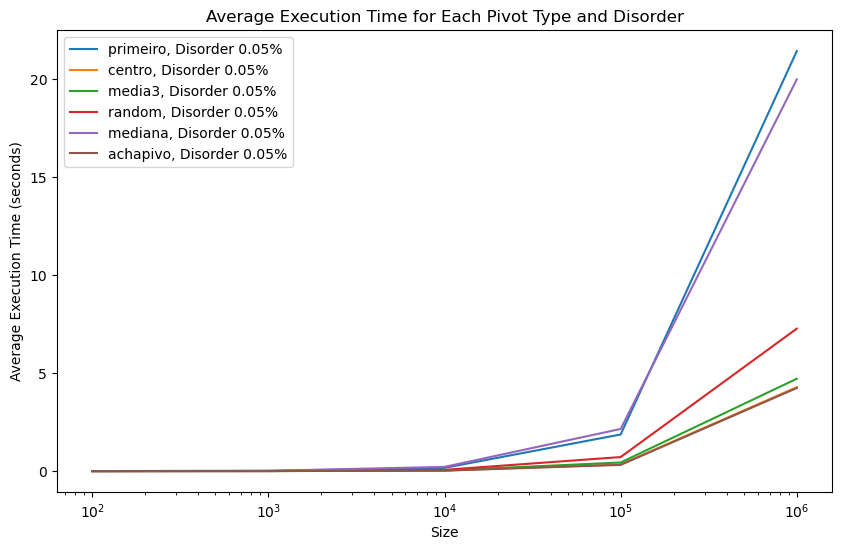

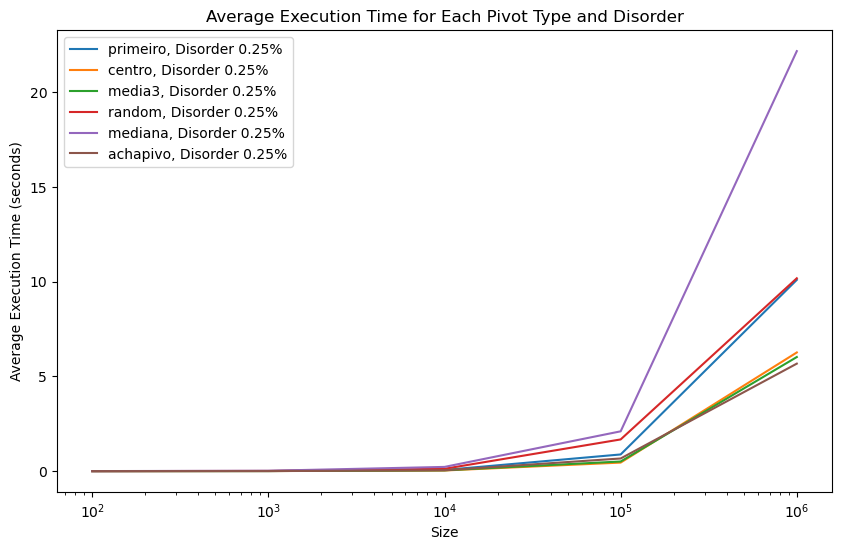

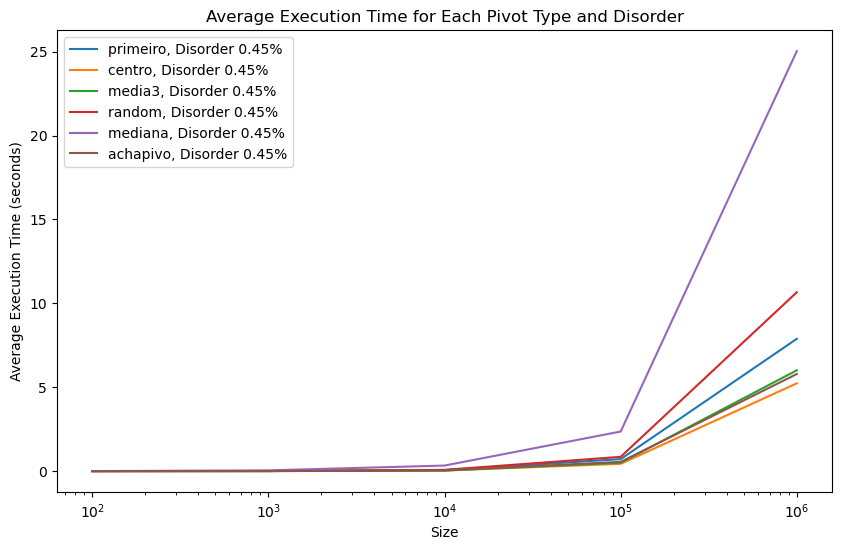

In [14]:
df = pd.read_csv('results/results.csv')
plot_avg_exec_time(df[df['pivot'] != 'ultimo'])

In [15]:
# Calculate average execution time for each size, grouped by pivot and disorder
result = df.groupby(['pivot', 'size', 'disorder'])['exec_time'].mean().reset_index()

# Find the minimum average execution time for each size, grouped by pivot
best_pivot_for_disorder_size = result.loc[result.groupby(['size', 'disorder'])['exec_time'].idxmin()]

result_best_pivots = pd.DataFrame(best_pivot_for_disorder_size)

In [16]:
result_best_pivots = result_best_pivots.sort_values(by='disorder', ascending=False)
result_best_pivots.to_csv('best_pivots.csv')
result_best_pivots

,pivot,size,disorder,exec_time
17,centro,100,0.45,0.000100
20,centro,1000,0.45,0.002696
23,centro,10000,0.45,0.034196
26,centro,100000,0.45,0.434104
29,centro,1000000,0.45,5.233512
16,centro,100,0.25,0.000100
4,achapivo,1000,0.25,0.002900
22,centro,10000,0.25,0.033900
25,centro,100000,0.25,0.450200
13,achapivo,1000000,0.25,5.670705
